In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../artifacts/raw/train.csv')

In [4]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)


In [5]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
df['repeated_guest'].value_counts()

repeated_guest
0    28266
1      754
Name: count, dtype: int64

#### our data is imbalanced

In [7]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

### DATA ANALYSIS

In [8]:
def num_plot_dist(df, num_feautures):
    fig, axes = plt.subplots(len(num_feautures), 2, figsize=(12, len(num_feautures) * 5))
    if len(num_feautures) == 1:
        axes = [axes]
    for i, col in enumerate(num_feautures):
        sns.histplot(data=df, x=col, ax=axes[i][0], kde=True, palette='Blues')
        axes[i][0].set_title(f"Histogram of {col}")

        sns.boxplot(data=df, x=col, ax=axes[i][1], palette='Blues')
        axes[i][1].set_title(f"Box plot of {col}")

    plt.tight_layout()
    plt.show()


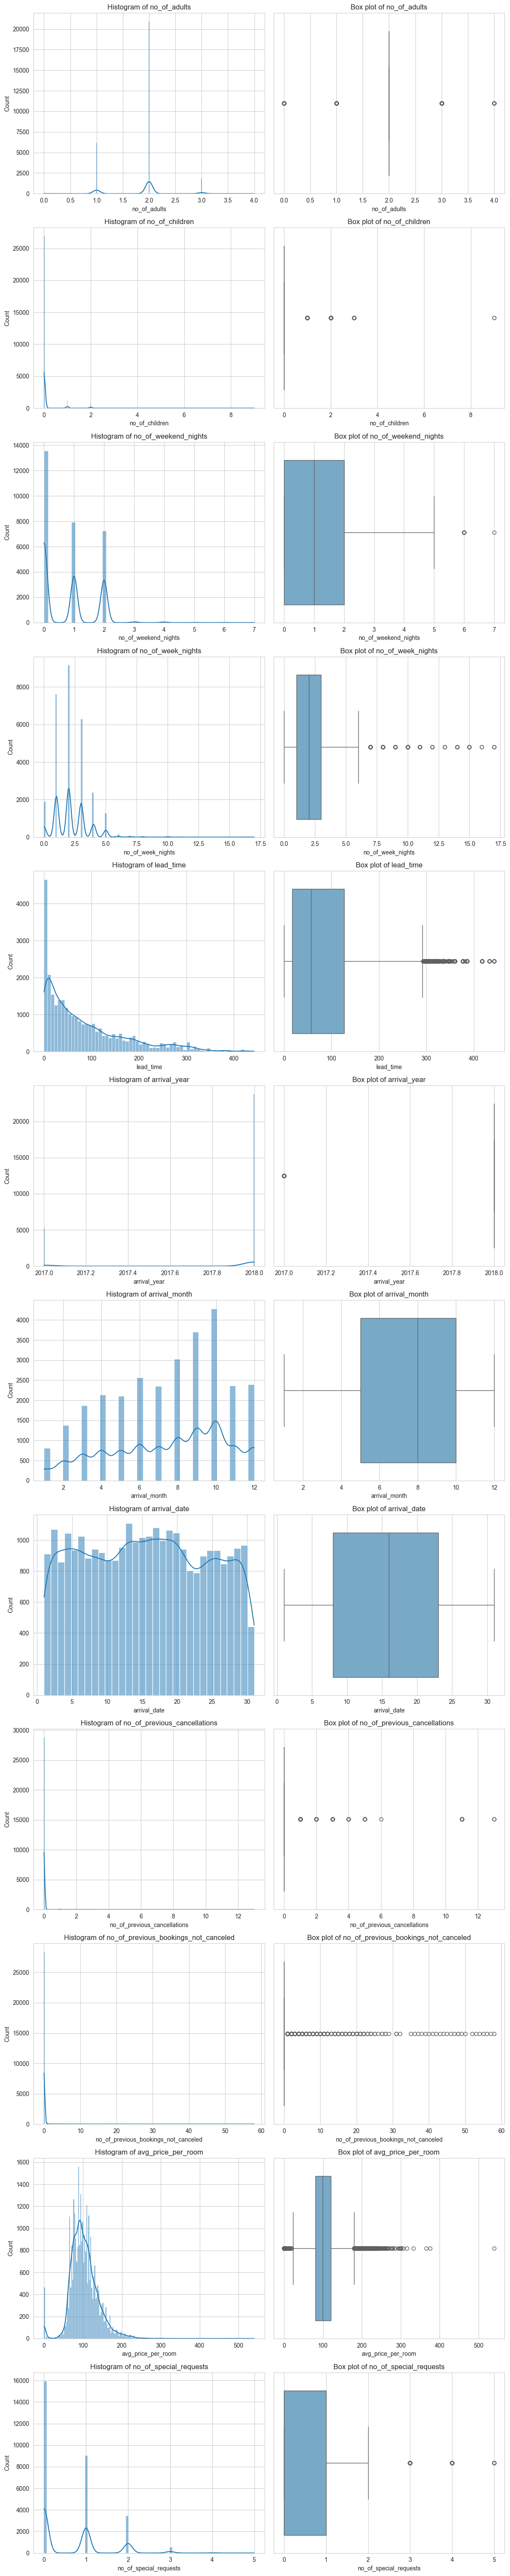

In [9]:
num_plot_dist(df, num_feautures=num_cols)

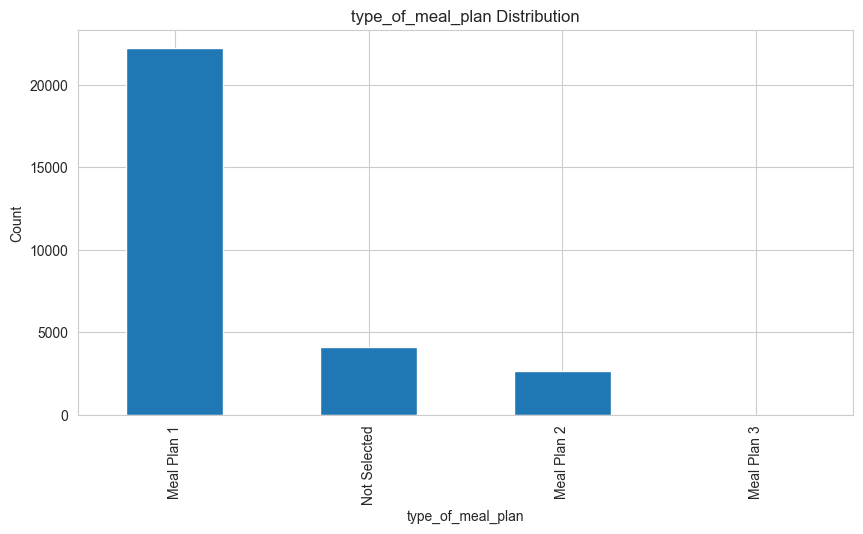

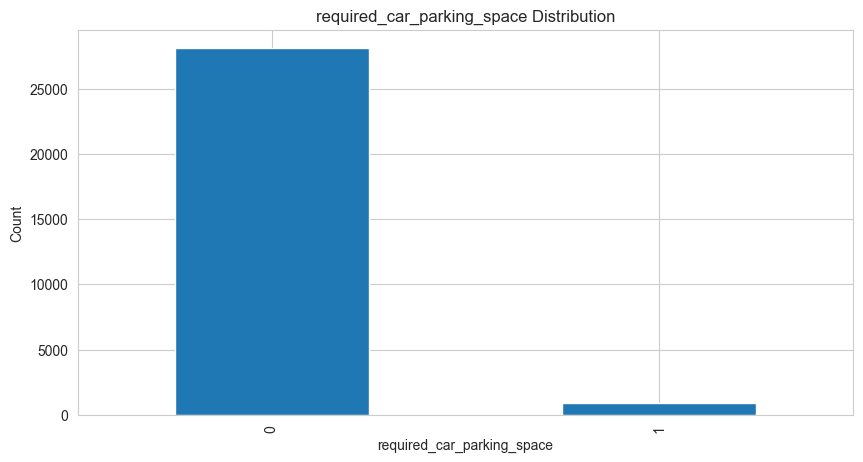

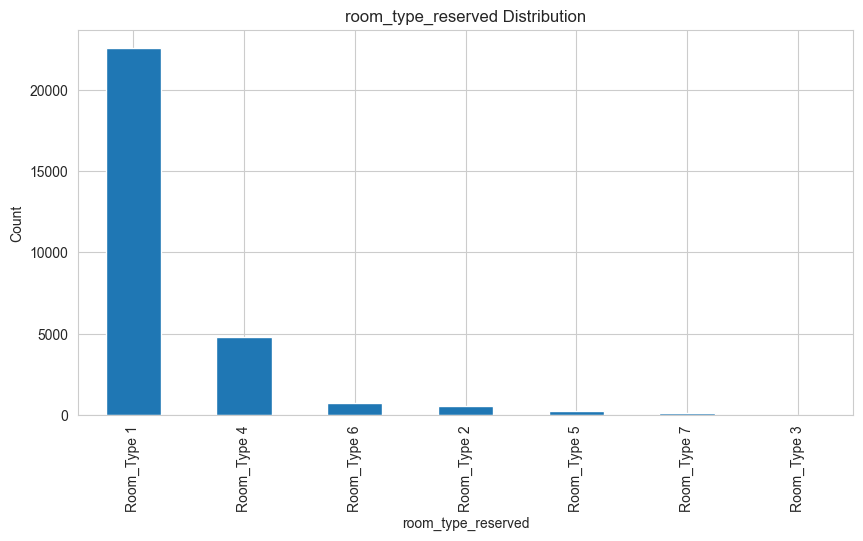

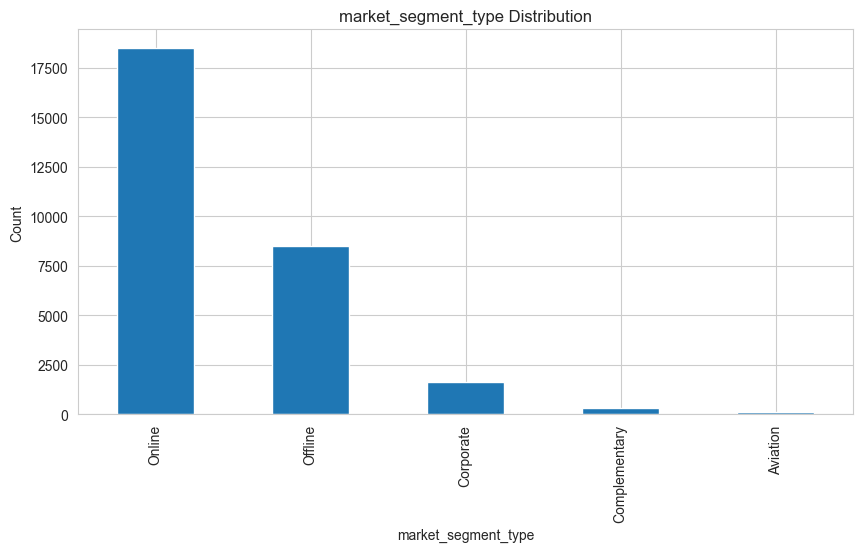

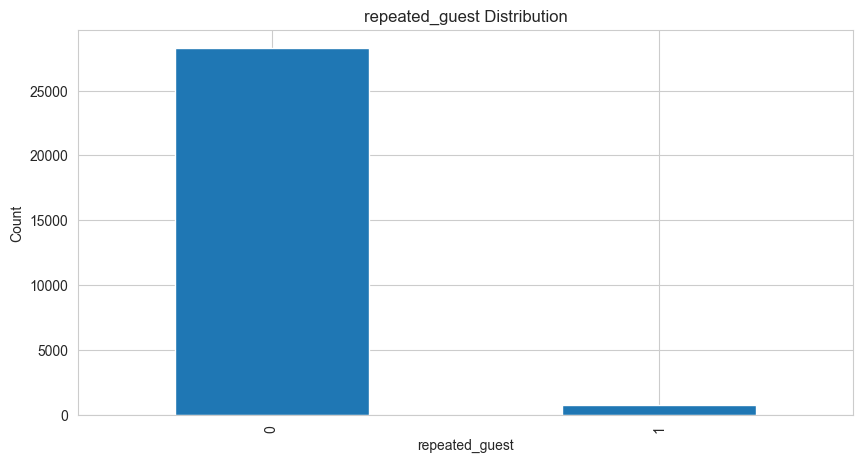

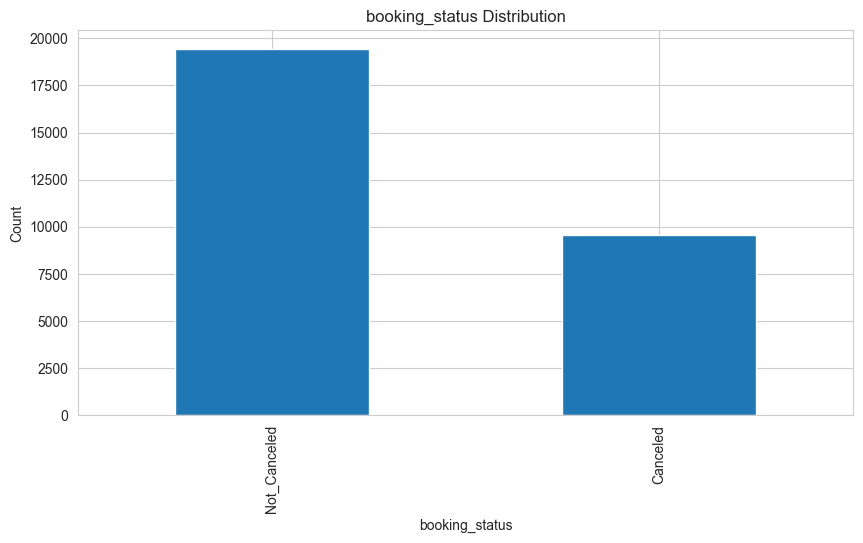

In [10]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 5))
    df[cat_feature].value_counts().plot(kind='bar')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

In [11]:
### Bivariate Analysis

def plot_bivariate(df, target, num_feautures):
    num_plots = len(num_feautures)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(num_feautures):
        sns.boxplot(data=df, x=target, y=col, ax=axes[i], palette='Blues')
        axes[i].set_title(f"{col} VS {target}")

    plt.tight_layout()
    plt.show()

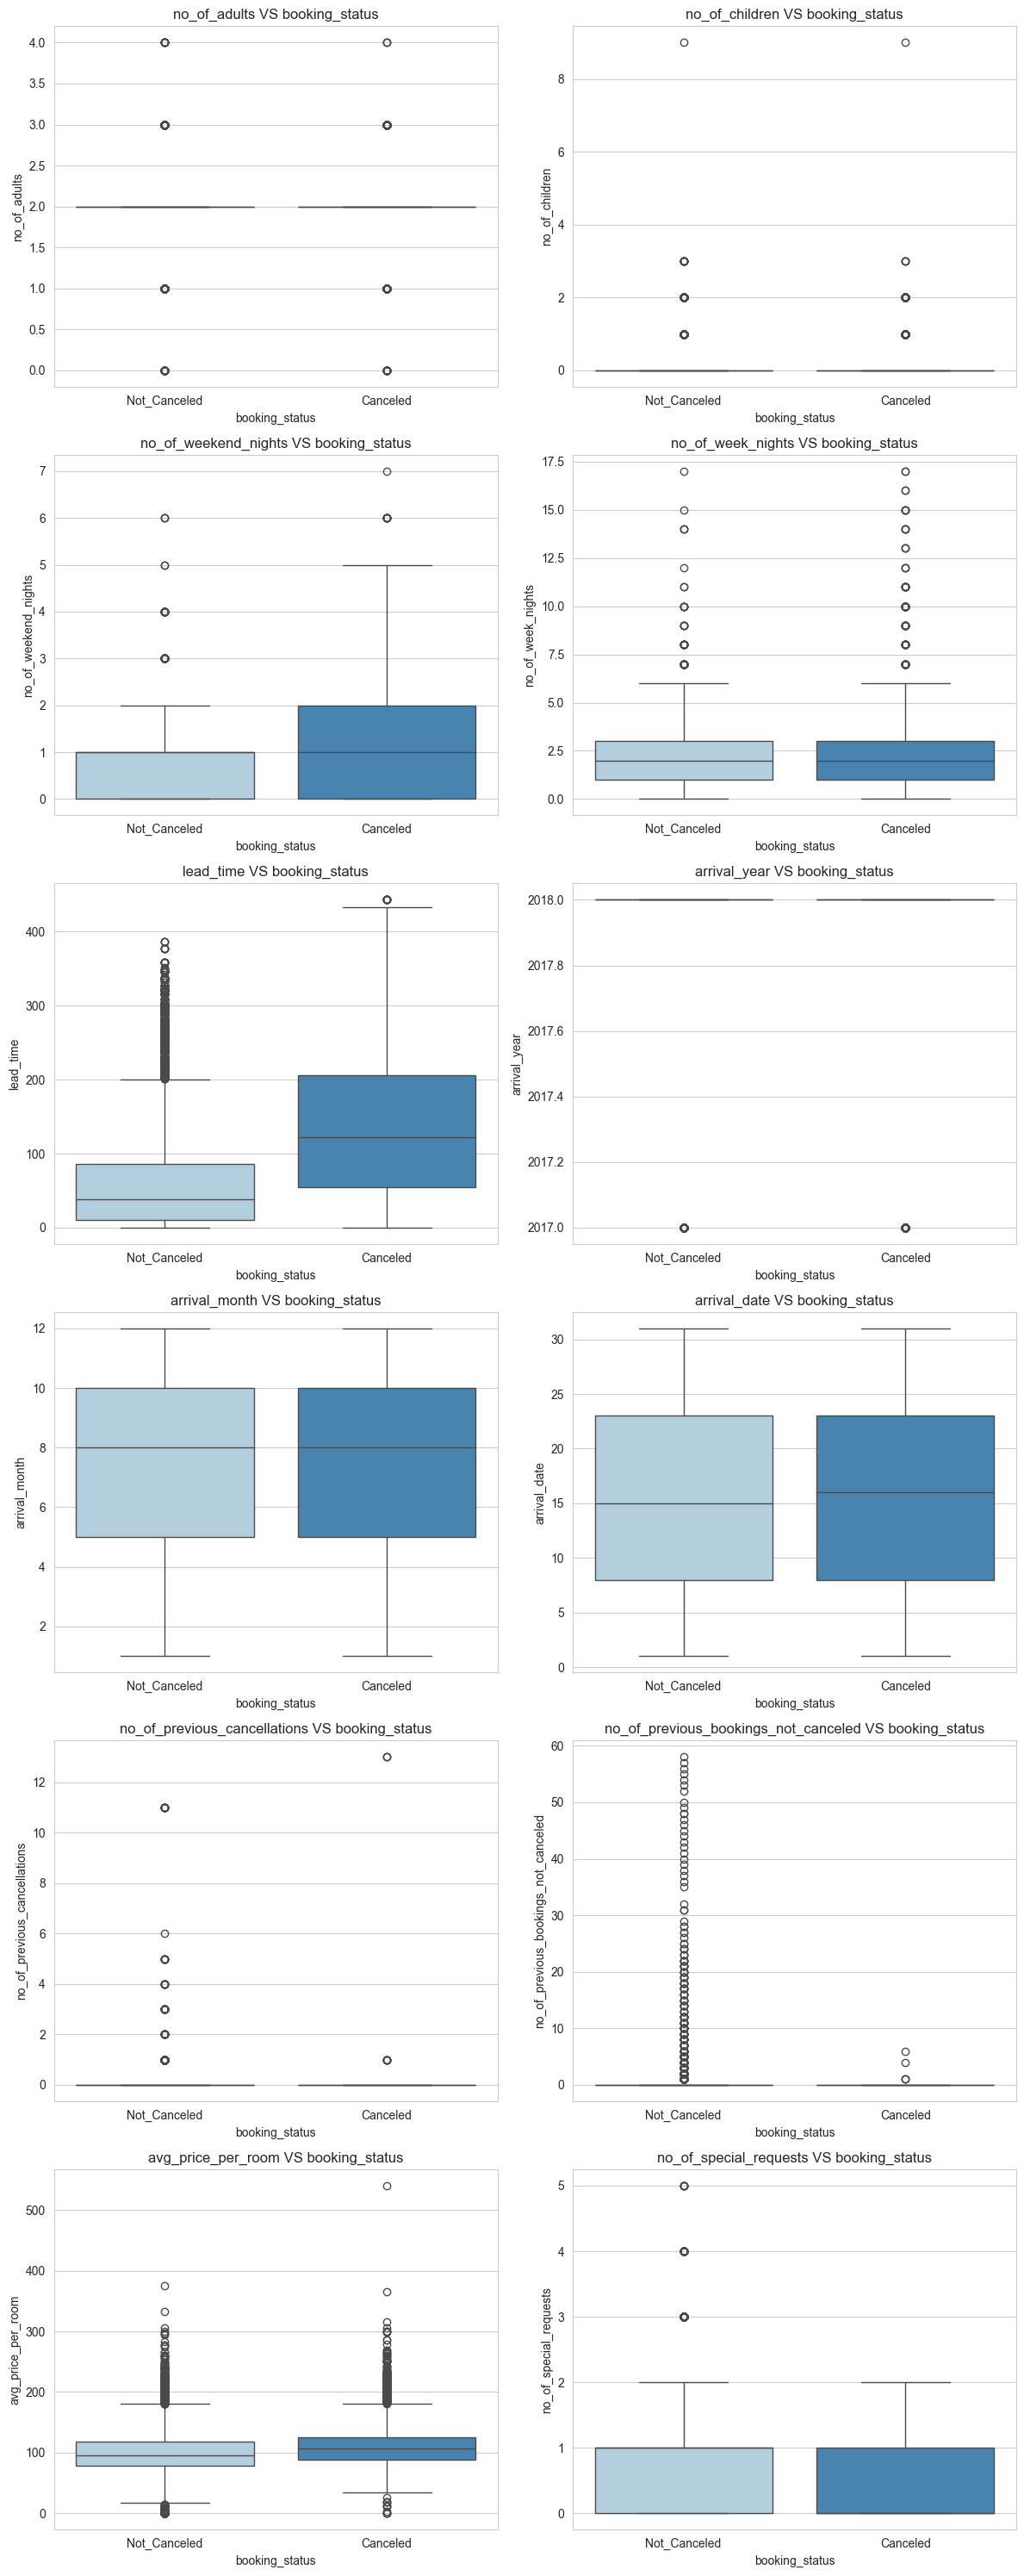

In [12]:
plot_bivariate(df, 'booking_status', num_cols)

<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

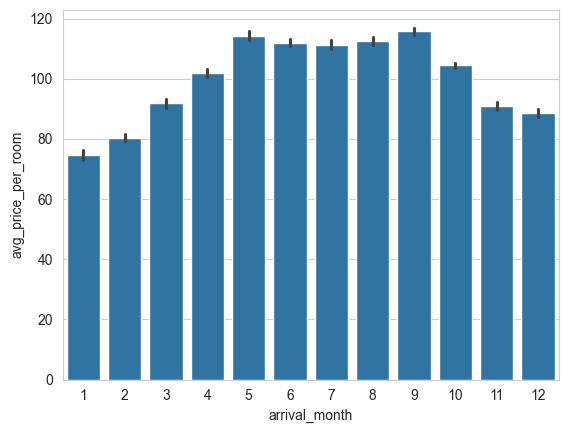

In [13]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=df)

In [14]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(cat_features):
        sns.countplot(data=df, x=col, hue=target, ax=axes[i], palette='Blues')
        axes[i].set_title(f"{col} VS {target}")

    plt.tight_layout()
    plt.show()

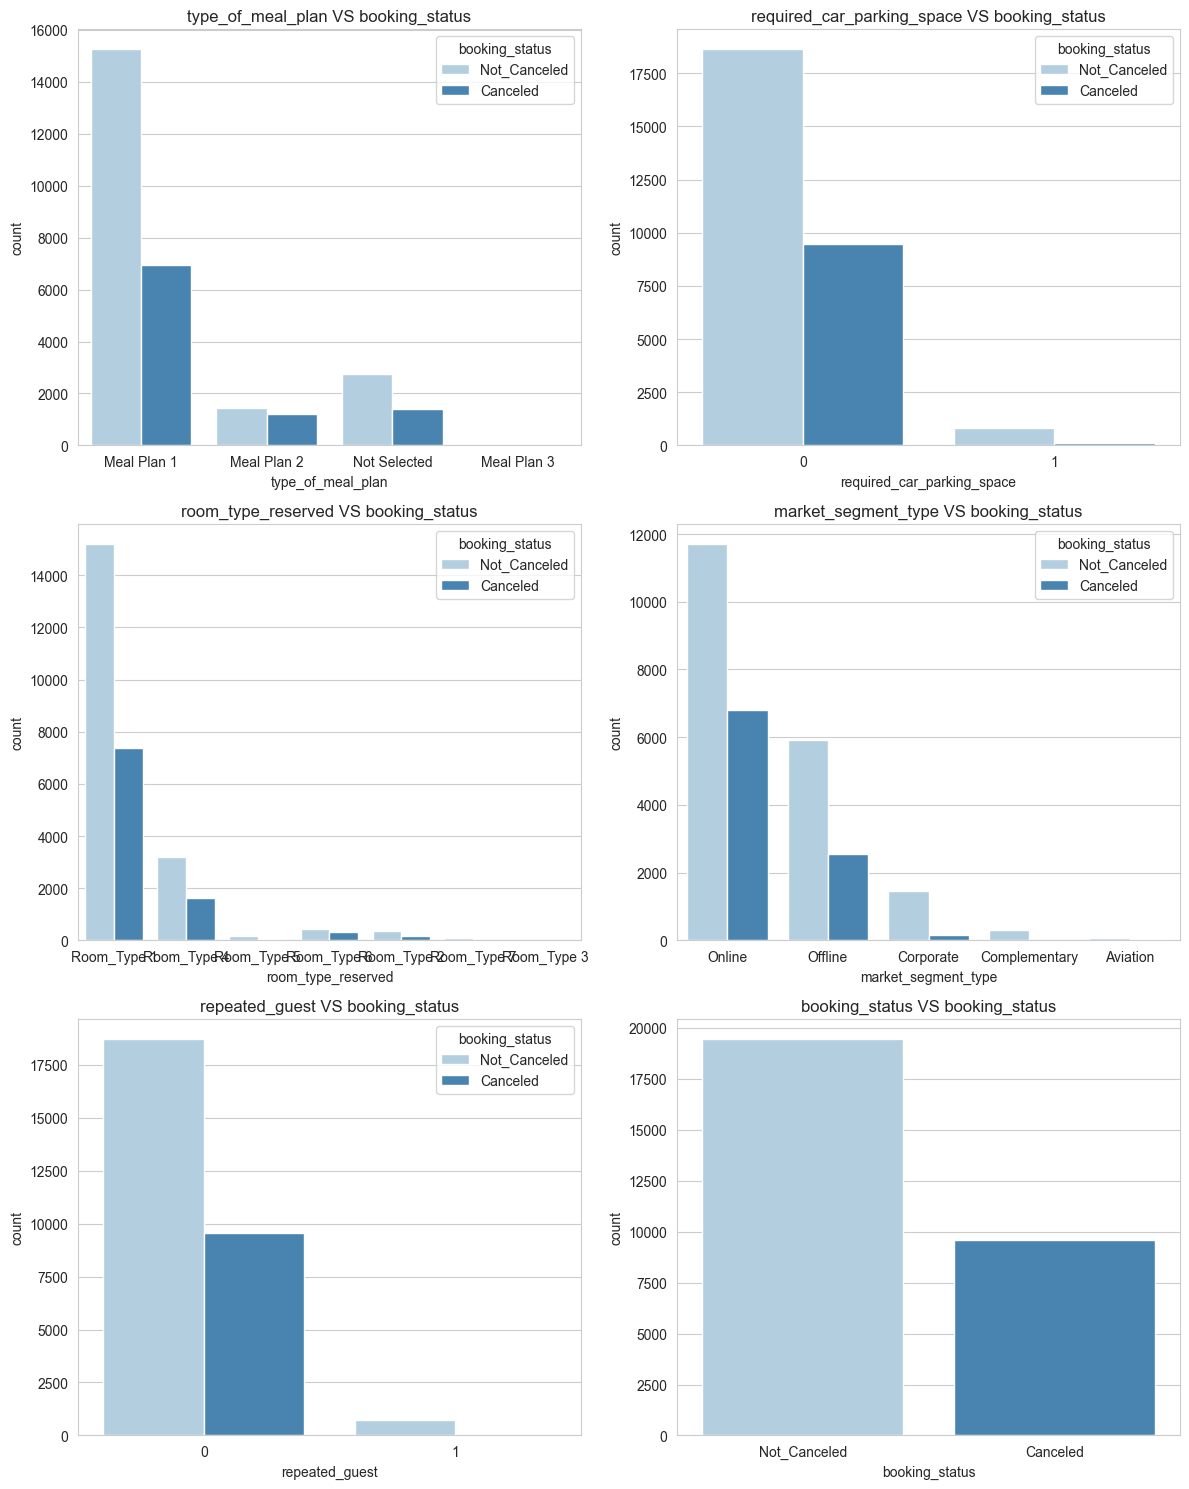

In [15]:
plot_bivariate_cat(df, 'booking_status', cat_cols)

In [16]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,1,Room_Type 1,1,2018,12,15,Online,0,0,0,97.00,3,Not_Canceled
1,2,0,1,2,Meal Plan 1,0,Room_Type 1,86,2017,11,20,Offline,0,0,0,49.07,0,Not_Canceled
2,2,0,1,3,Meal Plan 1,0,Room_Type 1,110,2018,8,15,Online,0,0,0,117.90,0,Canceled
3,1,0,1,5,Meal Plan 1,0,Room_Type 1,0,2018,10,18,Corporate,0,0,0,120.00,0,Not_Canceled
4,2,0,0,1,Meal Plan 1,0,Room_Type 1,56,2018,6,8,Offline,0,0,0,120.00,0,Not_Canceled


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  int64  
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  int64  
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

## CHECKING FOR MULTICOLLINEARITY

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(df)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,feature,VIF
0,const,3.578478e+07
1,no_of_adults,1.291994e+00
2,no_of_children,1.255593e+00
3,no_of_weekend_nights,1.064126e+00
4,no_of_week_nights,1.087956e+00
5,type_of_meal_plan,1.159037e+00
6,required_car_parking_space,1.032995e+00
7,room_type_reserved,1.528586e+00
8,lead_time,1.447192e+00
9,arrival_year,1.298287e+00


In [20]:
import scipy.stats as stats
print(stats.skew(df))

[-3.31330084e-01  4.59516602e+00  7.33882302e-01  1.58087216e+00
  1.78754647e+00  5.35208998e+00  1.73431326e+00  1.29387358e+00
 -1.66421372e+00 -3.50636716e-01  2.44131498e-02 -1.68324409e+00
  5.95942437e+00  2.53555468e+01  1.94105103e+01  6.70319523e-01
  1.16531482e+00 -7.24005267e-01]


In [21]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

y_res.value_counts()


booking_status
1    19449
0    19449
Name: count, dtype: int64

In [23]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res

In [24]:
df = balanced_df.copy()

In [25]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns='booking_status')
y = df['booking_status']

model = RandomForestClassifier(random_state=42)

model.fit(X, y)

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

In [26]:
feature_importance_df.sort_values('importance', ascending=False)[0:10]

,feature,importance
7,lead_time,0.305610
15,avg_price_per_room,0.147232
16,no_of_special_requests,0.138435
9,arrival_month,0.087554
10,arrival_date,0.083316
11,market_segment_type,0.057282
3,no_of_week_nights,0.045816
2,no_of_weekend_nights,0.032493
8,arrival_year,0.023328
0,no_of_adults,0.021505


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVC": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

metrics = {
    "Model": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": [],
    "F1Score": [],
}

In [29]:

for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['F1Score'].append(f1_score(y_test, y_pred))



[LightGBM] [Info] Number of positive: 15597, number of negative: 15521
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 31118, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501221 -> initscore=0.004885
[LightGBM] [Info] Start training from score 0.004885


In [31]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Recall,Precision,F1Score
0,Random Forest,0.921080,0.935877,0.907603,0.921524
1,Gradient Boosting,0.839075,0.852544,0.827621,0.839898
2,AdaBoost,0.780591,0.829439,0.752650,0.789181
3,Logistic Regression,0.786632,0.795431,0.778455,0.786852
4,SVC,0.691902,0.799844,0.654557,0.719944
5,Decision Tree,0.882776,0.881880,0.881422,0.881651
6,GaussianNB,0.560797,0.125649,0.908068,0.220753
7,KNeighborsClassifier,0.830206,0.789720,0.856178,0.821607
8,XGBoost,0.903213,0.917445,0.890401,0.903721
9,LightGBM,0.895630,0.920301,0.875309,0.897241


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)

params_dist = {
    'n_estimators': sp_randint(100, 500),
    'max_depth': sp_randint(10, 50),
    'min_samples_leaf': sp_randint(1, 5),
    'min_samples_split': sp_randint(2, 10),
    'bootstrap': [True, False]
}




In [36]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy',
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   3.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   3.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   3.9s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....0019E4CDD5B20>, 'min_samples_leaf': <scipy.stats....0019E54A474A0>, 'min_samples_split': <scipy.stats....0019ED521BE60>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [38]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
res = pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Recall': [recall_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred)],
    'F1Score': [f1_score(y_test, y_pred)]
})

In [39]:
res

,Accuracy,Recall,Precision,F1Score
0,0.915553,0.936656,0.897289,0.91655


In [40]:
metrics_df

,Model,Accuracy,Recall,Precision,F1Score
0,Random Forest,0.921080,0.935877,0.907603,0.921524
1,Gradient Boosting,0.839075,0.852544,0.827621,0.839898
2,AdaBoost,0.780591,0.829439,0.752650,0.789181
3,Logistic Regression,0.786632,0.795431,0.778455,0.786852
4,SVC,0.691902,0.799844,0.654557,0.719944
5,Decision Tree,0.882776,0.881880,0.881422,0.881651
6,GaussianNB,0.560797,0.125649,0.908068,0.220753
7,KNeighborsClassifier,0.830206,0.789720,0.856178,0.821607
8,XGBoost,0.903213,0.917445,0.890401,0.903721
9,LightGBM,0.895630,0.920301,0.875309,0.897241


In [41]:
import joblib

joblib.dump(best_model, 'random_forest.pkl')


['random_forest.pkl']

In [42]:
loaded_model = joblib.load('random_forest.pkl')
loaded_model.score(X_test, y_test)

0.9155526992287918